# Star Type Classification

I have a "Star dataset to predict star types" data set (from kaggle: Deepraj Baidya: [Kaggle Link](https://www.kaggle.com/deepu1109/star-dataset)

In this dataset each row represents a specific star and the columns represent specific parameters about that star. This dataset has 7 columns and 240 rows.

The goal of this project was to try and predict what kind of star it will be based off of certain parameters.

## Modules Used

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings('ignore')

## Exploratory Data Analysis

### Show Data Header

In [2]:
df = pd.read_csv('stars.csv')
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


### Information on the Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


### Shape of the Data

In [4]:
df.shape

(240, 7)

### Map the data from Numerical to an Object

In [5]:
star_mapping = {0:'Brown Dwarf',
                1:'Red Dwarf',
                2:'White Dwarf',
                3:'Main Seq',
                4:'Supergiant',
                5:'Hypergiant'}

y_numerical = df['Star type']
df['Star type'] = df['Star type'].map(star_mapping) 
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,Brown Dwarf,Red,M
1,3042,0.000500,0.1542,16.60,Brown Dwarf,Red,M
2,2600,0.000300,0.1020,18.70,Brown Dwarf,Red,M
3,2800,0.000200,0.1600,16.65,Brown Dwarf,Red,M
4,1939,0.000138,0.1030,20.06,Brown Dwarf,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Hypergiant,Blue,O
236,30839,834042.000000,1194.0000,-10.63,Hypergiant,Blue,O
237,8829,537493.000000,1423.0000,-10.73,Hypergiant,White,A
238,9235,404940.000000,1112.0000,-11.23,Hypergiant,White,A


### Information on the Data.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    object 
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 13.2+ KB


As you can see from above after running df.info() again after our mapping star type column, our column is no longer an int, but an object.

### Determine Missing Data

#### How many values are missing in each column

In [7]:
df.isnull().sum()

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64

#### The percentage of missing values for that column

In [8]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Temperature (K) - 0.0%
Luminosity(L/Lo) - 0.0%
Radius(R/Ro) - 0.0%
Absolute magnitude(Mv) - 0.0%
Star type - 0.0%
Star color - 0.0%
Spectral Class - 0.0%


#### Heatmap of the missing data

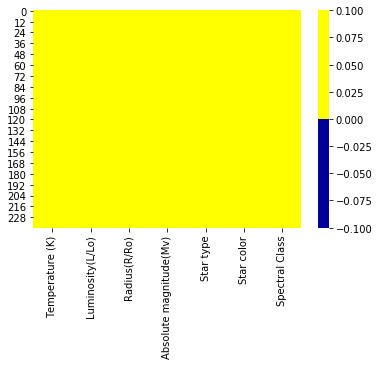

In [9]:
cols = df.columns[:30]
colours = ['#000099', '#ffff00']
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

For this dataset it was a bit excessive to include the different ways to see the missing data. However, it is a good habit to not just see how many rows of that column are missing data, but the percentage of that column that is missing.

### Describe the Data

In [10]:
df.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv)
count,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396
std,9552.425037,179432.244940,517.155763,10.532512
min,1939.000000,0.000080,0.008400,-11.920000
25%,3344.250000,0.000865,0.102750,-6.232500
50%,5776.000000,0.070500,0.762500,8.313000
75%,15055.500000,198050.000000,42.750000,13.697500
max,40000.000000,849420.000000,1948.500000,20.060000


## Visualization

### Correlation Heatmap

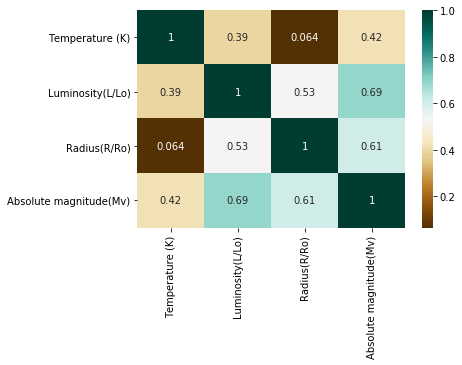

In [11]:
sns.heatmap(df.corr().abs(), annot=True, cmap='BrBG')

### Categorical Visualization

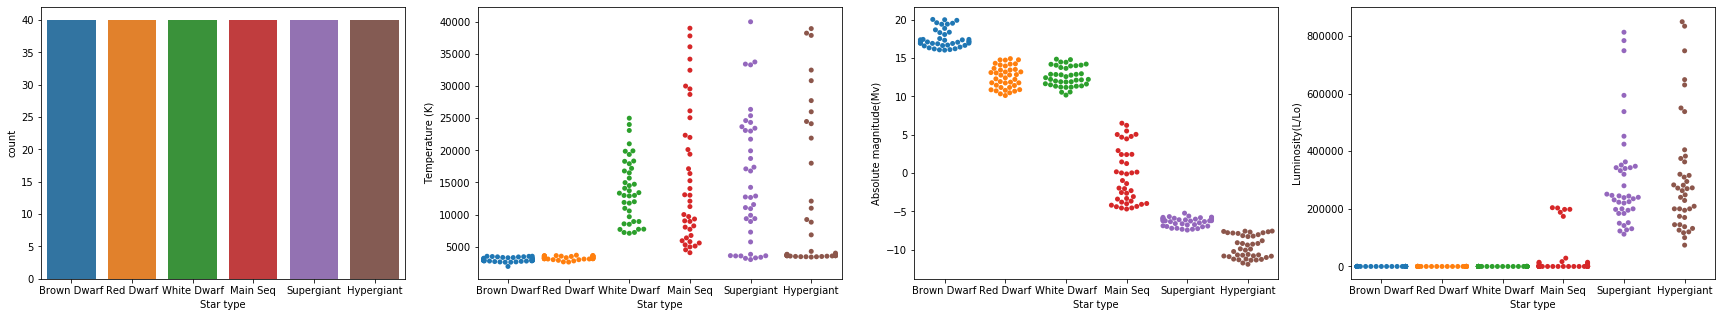

In [12]:
fig, axs = plt.subplots(ncols=4, figsize=(30,5))
sns.countplot(x="Star type", data=df, ax=axs[0])
sns.swarmplot(x="Star type", y="Temperature (K)", data=df, ax=axs[1])
sns.swarmplot(x="Star type", y="Absolute magnitude(Mv)", data=df, ax=axs[2])
sns.swarmplot(x="Star type", y="Luminosity(L/Lo)", data=df, ax=axs[3])

Since, I already know that I want to predict the Star type, I want to see how well the different columns interact with the different star types. 

### H-R Diagram Image

<img src="hr.jpg"/>

The image above is called the Hertzsprung-Russell(H-R) Diagram. The H-R diagram is scatter plot of stars showing the relationship between the stars' absolute magnitudes or luminosities versus their stellar classifications or effective temperatures. [Image Link](https://www.space.fm/astronomy/starsgalaxies/hrdiagram.html)

### H-R Diagram Graphed from Data

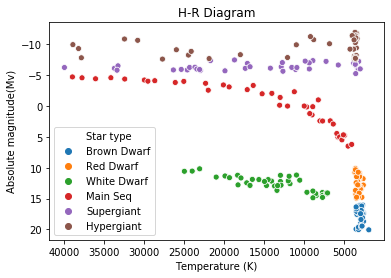

In [13]:
sns.scatterplot(x="Temperature (K)", y="Absolute magnitude(Mv)", hue="Star type", data=df)
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.title("H-R Diagram")

The graph above is created from the data in my dataframe. As you can see it follows the same pattern as the actual H-R Diagram.

## Model Selection

<ul>
    <li> Support Vector Machine </li>
    <li> Logistic Regression </li>
    <li> Decision Tree </li>
</ul>

### Support Vector Machine

In [14]:
X = df[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']]
y = df['Star type']

#### Split Data

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#### Create Pipeline

In [16]:
pipeline = make_pipeline(StandardScaler(), SVC(random_state=1))

#### Choose Parameters for Grid Search

In [17]:
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'svc__C': param_range,
               'svc__kernel': ['linear']},
              {'svc__C': param_range,
               'svc__gamma': param_range,
               'svc__kernel': ['rbf']}]

#### Use Grid Search to tune Hyperparameters for selected Model

In [18]:
gs = GridSearchCV(estimator=pipeline,
                  param_grid=param_grid,
                  scoring='accuracy',
                  refit=True,
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9949999999999999
{'svc__C': 10.0, 'svc__kernel': 'linear'}


#### Create Model from Best Parameters

In [19]:
clf = SVC(C=10, kernel='linear', random_state=1)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test2 = sc.transform(X_test)
clf.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

#### Score the Data

In [20]:
predict_test = clf.predict(X_test2)
print(metrics.accuracy_score(y_test, predict_test))

1.0


#### Combine Data for visualzation

In [21]:
X_test = X_test.reset_index()
X_test = X_test.drop(columns=['index'])
df_predict = pd.DataFrame(predict_test, columns=['Star type'])
predict_result = pd.concat([X_test, df_predict], axis=1)

y_test = y_test.reset_index()
y_test = y_test.drop(columns=['index'])
actual_result =  pd.concat([X_test, y_test], axis=1)

#### Visualizing the Distribution of the Data

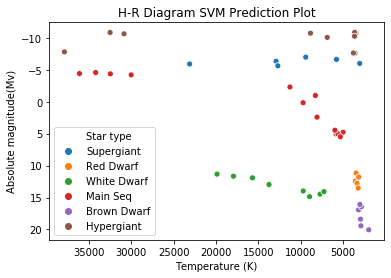

In [22]:
sns.scatterplot(x="Temperature (K)", y="Absolute magnitude(Mv)", hue="Star type", data=predict_result)
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.title("H-R Diagram SVM Prediction Plot")

#### Plot Decisioin Regions

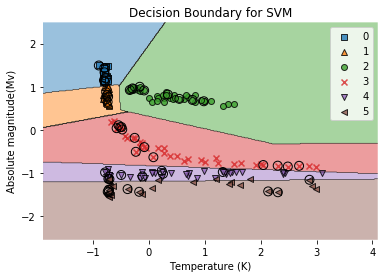

In [23]:
X = df[['Temperature (K)', 'Absolute magnitude(Mv)']]
y = df['Star type']
sc = StandardScaler()
X = X.to_numpy()
y = y_numerical.to_numpy()
X = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
clf = SVC(C=10, kernel='linear', random_state=1)
X_train = sc.fit_transform(X_train)
X_test2 = sc.transform(X_test)
clf.fit(X_train, y_train)

plot_decision_regions(X, y, clf=clf, legend=2, X_highlight=X_test)
plt.xlabel('Temperature (K)')
plt.ylabel('Absolute magnitude(Mv)')
plt.title('Decision Boundary for SVM')
plt.legend(loc='upper right')
plt.show()

### Logistic Regression

In [24]:
X = df[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']]
y = df['Star type']

#### Split Data

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#### Create Pipeline

In [26]:
pipeline = make_pipeline(StandardScaler(), LogisticRegression(random_state=1))

#### Choose Parameters for Grid Search

In [27]:
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'logisticregression__C': param_range,
               'logisticregression__solver':['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
               'logisticregression__max_iter':[100, 1000, 10000, 100000]}]

#### Use Grid Search to tune Hyperparameters for selected Model

In [28]:
gs = GridSearchCV(estimator=pipeline,
                  param_grid=param_grid,
                  scoring='accuracy',
                  refit=True,
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9949999999999999
{'logisticregression__C': 100.0, 'logisticregression__max_iter': 100, 'logisticregression__solver': 'lbfgs'}


#### Create Model from Best Parameters

In [29]:
logreg = LogisticRegression(C=100, solver='lbfgs', max_iter=100)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test2 = sc.transform(X_test)
logreg.fit(X_train, y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Score the Data

In [30]:
predict_test = logreg.predict(X_test2)
print(metrics.accuracy_score(y_test, predict_test))

1.0


#### Combine Data for visualzation

In [31]:
X_test = X_test.reset_index()
X_test = X_test.drop(columns=['index'])
df_predict = pd.DataFrame(predict_test, columns=['Star type'])
predict_result = pd.concat([X_test, df_predict], axis=1)

y_test = y_test.reset_index()
y_test = y_test.drop(columns=['index'])
actual_result =  pd.concat([X_test, y_test], axis=1)

#### Visualizing the Distribution of the Data

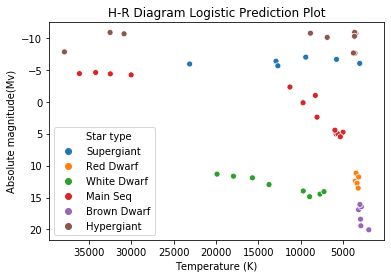

In [32]:
sns.scatterplot(x="Temperature (K)", y="Absolute magnitude(Mv)", hue="Star type", data=predict_result)
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.title("H-R Diagram Logistic Prediction Plot")

#### Plot Decisioin Regions

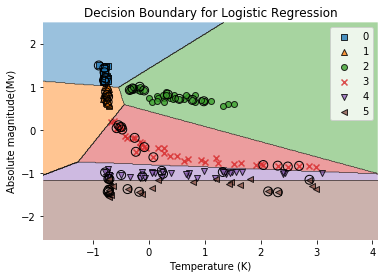

In [33]:
X = df[['Temperature (K)', 'Absolute magnitude(Mv)']]
y = df['Star type']
sc = StandardScaler()
X = X.to_numpy()
y = y_numerical.to_numpy()
X = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
clf = LogisticRegression(C=100, solver='lbfgs', max_iter=100)
X_train = sc.fit_transform(X_train)
X_test2 = sc.transform(X_test)
clf.fit(X_train, y_train)

plot_decision_regions(X, y, clf=clf, legend=2, X_highlight=X_test)
plt.xlabel('Temperature (K)')
plt.ylabel('Absolute magnitude(Mv)')
plt.title('Decision Boundary for Logistic Regression')
plt.legend(loc='upper right')
plt.show()

### Decision Tree

In [34]:
X = df[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']]
y = df['Star type']

#### Split Data

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#### Create Pipeline

In [36]:
pipeline = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1))

#### Choose Parameters for Grid Search

In [37]:
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'decisiontreeclassifier__criterion':['gini', 'entropy'],
               'decisiontreeclassifier__splitter':['best', 'random'],
               'decisiontreeclassifier__max_depth': param_range}]

#### Use Grid Search to tune Hyperparameters for selected Model

In [38]:
gs = GridSearchCV(estimator=pipeline,
                  param_grid=param_grid,
                  scoring='accuracy',
                  refit=True,
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

1.0
{'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 10.0, 'decisiontreeclassifier__splitter': 'best'}


#### Create Model from Best Parameters

In [39]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=10, splitter='best')
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test2 = sc.transform(X_test)
clf = clf.fit(X_train, y_train)

#### Score the Data

In [40]:
predict_test = clf.predict(X_test2)
print(metrics.accuracy_score(y_test, predict_test))

1.0


#### Tree Visualization

[Text(372.0, 570.7800000000001, 'X[3] <= 0.341\nentropy = 2.579\nsamples = 192\nvalue = [34, 30, 27, 35, 34, 32]'),
 Text(223.20000000000002, 407.70000000000005, 'X[2] <= 0.365\nentropy = 1.579\nsamples = 91\nvalue = [0, 30, 27, 0, 34, 0]'),
 Text(148.8, 244.62, 'X[3] <= -0.919\nentropy = 0.99\nsamples = 61\nvalue = [0, 0, 27, 0, 34, 0]'),
 Text(74.4, 81.53999999999996, 'entropy = 0.0\nsamples = 34\nvalue = [0, 0, 0, 0, 34, 0]'),
 Text(223.20000000000002, 81.53999999999996, 'entropy = 0.0\nsamples = 27\nvalue = [0, 0, 27, 0, 0, 0]'),
 Text(297.6, 244.62, 'entropy = 0.0\nsamples = 30\nvalue = [0, 30, 0, 0, 0, 0]'),
 Text(520.8000000000001, 407.70000000000005, 'X[3] <= 1.022\nentropy = 1.584\nsamples = 101\nvalue = [34, 0, 0, 35, 0, 32]'),
 Text(446.40000000000003, 244.62, 'X[2] <= -0.444\nentropy = 0.999\nsamples = 67\nvalue = [0, 0, 0, 35, 0, 32]'),
 Text(372.0, 81.53999999999996, 'entropy = 0.0\nsamples = 32\nvalue = [0, 0, 0, 0, 0, 32]'),
 Text(520.8000000000001, 81.53999999999996, '

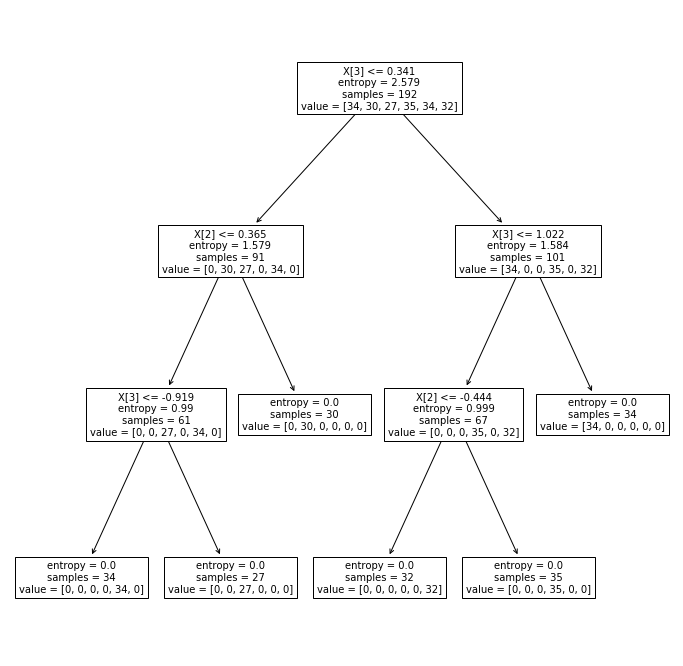

In [41]:
fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(clf, fontsize = 10) 

#### Combine Data for visualzation

In [42]:
X_test = X_test.reset_index()
X_test = X_test.drop(columns=['index'])
df_predict = pd.DataFrame(predict_test, columns=['Star type'])
predict_result = pd.concat([X_test, df_predict], axis=1)

y_test = y_test.reset_index()
y_test = y_test.drop(columns=['index'])
actual_result =  pd.concat([X_test, y_test], axis=1)

#### Visualizing the Distribution of the Data

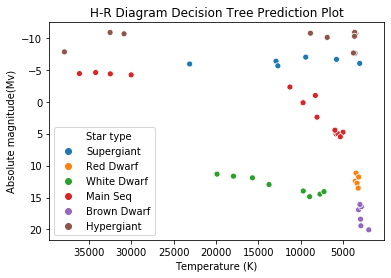

In [43]:
sns.scatterplot(x="Temperature (K)", y="Absolute magnitude(Mv)", hue="Star type", data=predict_result)
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.title("H-R Diagram Decision Tree Prediction Plot")

#### Plot Decisioin Regions

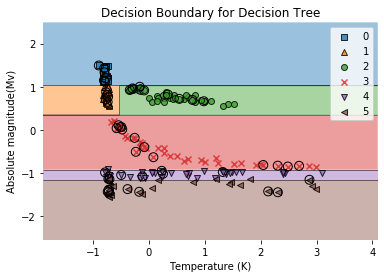

In [44]:
X = df[['Temperature (K)', 'Absolute magnitude(Mv)']]
y = df['Star type']
sc = StandardScaler()
X = X.to_numpy()
y = y_numerical.to_numpy()
X = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
clf = DecisionTreeClassifier(criterion='entropy', max_depth=10, splitter='best')
X_train = sc.fit_transform(X_train)
X_test2 = sc.transform(X_test)
clf.fit(X_train, y_train)

plot_decision_regions(X, y, clf=clf, legend=2, X_highlight=X_test)
plt.xlabel('Temperature (K)')
plt.ylabel('Absolute magnitude(Mv)')
plt.title('Decision Boundary for Decision Tree')
plt.legend(loc='upper right')
plt.show()

# Conclusion

In this project, I used a Star dataset to build a classifier to predict a star type. Three different models(Support Vector Machine, Logistic Regression, and Decision Tree) were used to predict the star type. A Grid Search was also used to choose the best hyperparameters for each model. All three models, when ran through the pipeline, gave a value of 99% accuracy. When I created a model with those parameters, I achieved a score of 100%. 